# **Phase 2 - Data Exploration & Visualization**

The data exploration and visualization stage complement each other and represent the main part of the descriptive process the data provide us, in a first moment. During this stage, we start to take some descriptive notes from the dataset in order to identify first trends, patterns, and relationships among the variables.

Visualization tools will play a crucial role in this process, as they allow us to represent data graphically, making complex information easier to understand and interpret. By combining exploration and visualization, we enhance our ability to draw meaningful insights, guiding our analysis until informing our conclusions.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
files = {
    'datasets/clean_dataset.xlsx': ['SGIF_2011_2020'],
    'datasets/Estatisticas_Incendios_SGIF_2001_2023.xlsx': ['Estatisticas_PortugalContinent', 'Estatisticas_Distrito', 'Estatisticas_Concelho']
}

datasets = {}

for file, sheets in files.items():
    for sheet in sheets:
        if sheet == 'SGIF_2011_2020':
            datasets[sheet] = pd.read_excel(file, sheet_name='Sheet1')
        else:
            datasets[sheet] = pd.read_excel(file, sheet_name=sheet)

datasets

{'SGIF_2011_2020':       Codigo_SGIF   Ano  AreaPov_ha  AreaMato_ha  AreaAgric_ha  AreaTotal_ha  \
 0          DM2111  2011        0.00       0.0100           0.0        0.0100   
 1          DM2113  2011        0.00       0.0050           0.0        0.0050   
 2          DM2116  2011        0.04       0.0000           0.0        0.0400   
 3          BL1112  2011        5.00     135.0000           0.0      140.0000   
 4          BL1113  2011        0.00       0.1000           0.0        0.1000   
 ...           ...   ...         ...          ...           ...           ...   
 18411   DM2203922  2020        0.00       0.0050           0.0        0.0050   
 18412    BL120914  2020        0.00       0.0100           0.0        0.0100   
 18413    BL120915  2020        0.00       0.0014           0.0        0.0014   
 18414    BL120916  2020        0.00       0.0050           0.0        0.0050   
 18415   DM2203935  2020        0.00       0.0100           0.0        0.0100   
 
        

### Fire Duration and Frequency

To explore how the average fire duration influences the frequency of wildfires across different regions over time, we need to identify columns related to fire duration and frequency. The <i>'Num_IncendiosRurais'</i> column seems to represent the number of rural fires, which could be used as a measure of frequency. The <i>'Duracao_Horas'</i> column appears to help us finding insights about the fires duration.

In order to start summarizing data, we will calculate basic key statistics which might help us describing this context.

Total number of fires for each district of interest, for the relevant years:

In [7]:
# Define the districts of interest
districts_of_interest = ['Porto', 'Viseu', 'Faro']

# Normalize the 'Distrito' column to handle case sensitivity
datasets['Estatisticas_Distrito']['Distrito'] = datasets['Estatisticas_Distrito']['Distrito'].str.strip().str.title()

# Filter the dataset for the districts of interest
filtered_districts = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].isin(districts_of_interest)]

# Group by district and sum the number of incidents
total_fires_per_district = filtered_districts.groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()

# Print the total number of fires for each district
print("Total number of fires for each district:")
for index, row in total_fires_per_district.iterrows():
    print(f"{row['Distrito']}: {row['Num_IncendiosRurais']}")

Total number of fires for each district:
Faro: 8968
Porto: 102395
Viseu: 38326


Also as a starting reference, we may find the overall average fire duration (including all of the locations described in the dataset).

In [8]:
average_fire_duration = round(datasets['SGIF_2011_2020']['Duracao_Horas'].mean(), 2)

# Print the result
print(f"Average fire duration in hours: {average_fire_duration}h")# Calculate the average fire duration from the 'SGIF_2011_2020' dataset


Average fire duration in hours: 1.94h


For comparing wildfire durations across municipalities like Porto, Viseu, and Faro for specific years (2011, 2016, 2020), we should focus on the data at the municipal level. We need to filter this data for the specified municipalities and years, and check the results.

(For the specific case of the municipality of Porto, as the entry "Porto" doesn't exist in the relevant dataset - and this cannot be considered as a missing value case - we decided to compute the average of the district municipalities of Porto in order to keep the dataset stability, and not promote any substancial change in the data results.)

In [9]:
# Specify the years and municipalities of interest
years = [2011, 2016, 2020]
municipalities = ['Viseu', 'Faro']
special_case = 'Porto'  # Porto will be treated as a district average

# Dictionary to store average fire durations
average_durations = {}

for municipality in municipalities:
    average_durations[municipality] = {}
    for year in years:
        # Filter by municipality and specific year
        avg_duration = datasets['SGIF_2011_2020'][
            (datasets['SGIF_2011_2020']['Distrito'].str.strip().str.lower() == municipality.lower()) &
            (datasets['SGIF_2011_2020']['Ano'] == year)
        ]['Duracao_Horas'].mean()
        
        average_durations[municipality][year] = round(avg_duration, 2) if not np.isnan(avg_duration) else "No data"

# Handle Porto as a special case for district average
average_durations[special_case] = {}
for year in years:
    avg_duration_porto = datasets['SGIF_2011_2020'][
        (datasets['SGIF_2011_2020']['Distrito'].str.strip().str.lower() == special_case.lower()) &
        (datasets['SGIF_2011_2020']['Ano'] == year)
    ]['Duracao_Horas'].mean()
    
    average_durations[special_case][year] = round(avg_duration_porto, 2) if not np.isnan(avg_duration_porto) else "No data"

# Display the results with spacing between municipalities
for municipality, yearly_data in average_durations.items():
    for year, duration in yearly_data.items():
        print(f"Average fire duration in {municipality} municipality in {year}: {duration} hours")
    print()  # Adds a blank line between municipalities

Average fire duration in Viseu municipality in 2011: 3.15 hours
Average fire duration in Viseu municipality in 2016: 2.23 hours
Average fire duration in Viseu municipality in 2020: 2.08 hours

Average fire duration in Faro municipality in 2011: 2.04 hours
Average fire duration in Faro municipality in 2016: 1.15 hours
Average fire duration in Faro municipality in 2020: 1.41 hours

Average fire duration in Porto municipality in 2011: 2.27 hours
Average fire duration in Porto municipality in 2016: 1.27 hours
Average fire duration in Porto municipality in 2020: 1.05 hours



### Fire Duration vs Frequency Across Regions Over Time

<Figure size 1200x600 with 0 Axes>

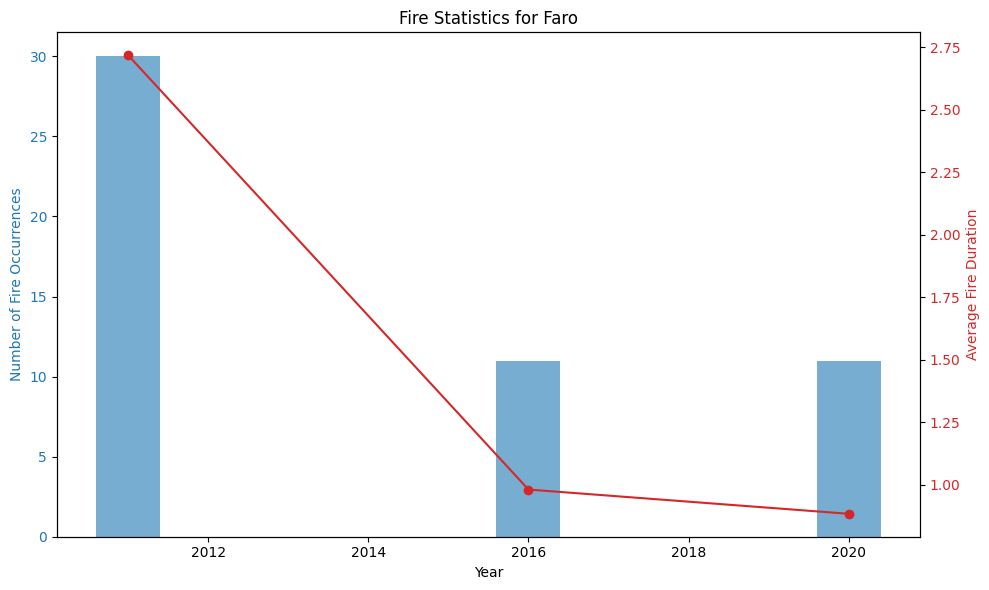

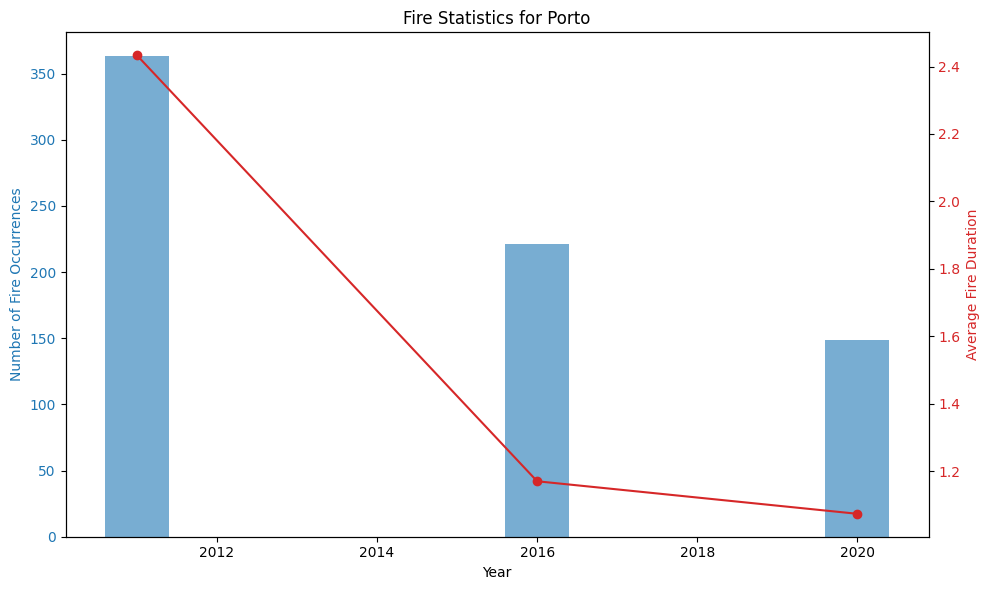

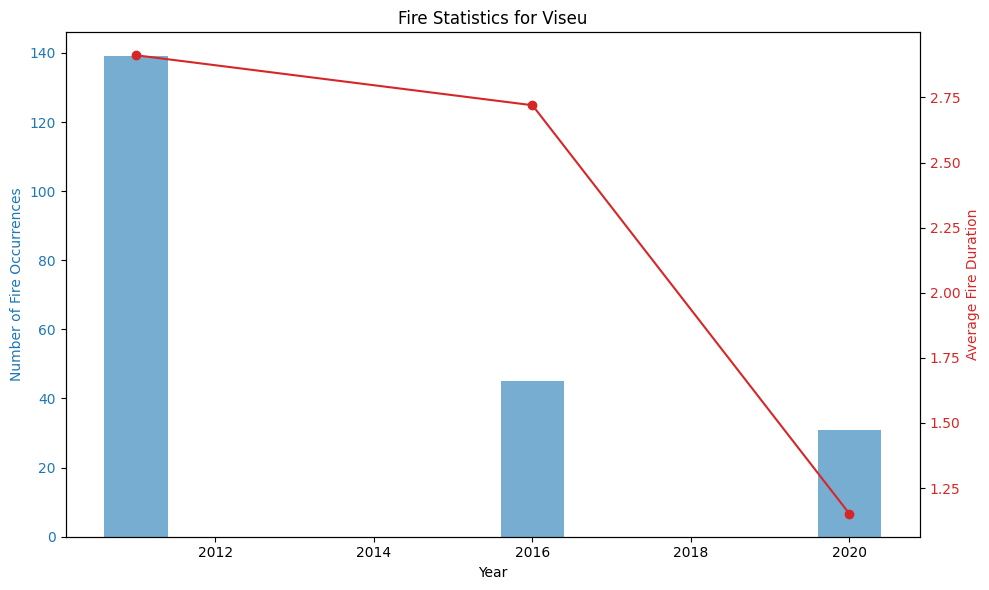

In [12]:
dataset_sample = datasets['SGIF_2011_2020'].sample(n=1000, random_state=999)
dataset_sample.sample(n=5, random_state=999)

# Agrupar os dados por distrito e ano
df = dataset_sample
grouped = df.groupby(['Distrito', 'Ano']).agg(
    avg_fire_duration = ('Duracao_Horas', 'mean'),  # Duração média do fogo
    fire_occurrences = ('Duracao_Horas', 'count')   # Número de ocorrências de incêndios
).reset_index()

# Plotando o gráfico com dois eixos Y (dual-axis plot)
plt.figure(figsize=(12, 6))
regions = grouped['Distrito'].unique()

for region in regions:
    data_region = grouped[grouped['Distrito'] == region]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Gráfico de barras (eixo esquerdo) - Número de ocorrências de incêndios
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Fire Occurrences', color=color)
    ax1.bar(data_region['Ano'], data_region['fire_occurrences'], color=color, alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color)

    # Eixo direito para a duração média dos incêndios
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Average Fire Duration', color=color)
    ax2.plot(data_region['Ano'], data_region['avg_fire_duration'], color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Fire Statistics for {region}')
    fig.tight_layout()
    plt.show()


The dual-axis plot visualizes fire statistics for different regions (districts) over the years. Specifically, it displays two key metrics:

1. Number of Fire Occurrences (Bar Graph): Represented by blue bars on the left y-axis, this metric shows the total count of fire occurrences for each district in the specified years. Higher bars indicate more frequent fire incidents in that region for a given year.

2. Average Fire Duration (Line Graph): Illustrated by a red line on the right y-axis, this metric indicates the average duration of fires (in hours) for each district. The data points connected by the line represent the average duration for the corresponding years, allowing us to see trends in how long fires last over time.

By observing these graphs, we can see that the duration of fires has shown a tendency to decrease over the years, except for Faro, where we identified an increase from 2016 to 2020.